In [39]:
import pandas as pd
import glob

# 1. 读取 cq 和 rf 的公司数据
cq_company = pd.read_csv(r'../bishi/m_source/cq/company.csv')
rf_company = pd.read_csv(r'../bishi/m_source/rf/company.csv')

# 2. 筛选美国股票（NASDAQ 和 NYSE）
cq_us_stocks = cq_company[cq_company['iq_company_ticker'].str.contains("NYSE|NASDAQ")]
rf_us_stocks = rf_company[rf_company['RIC'].str.contains("\.O|\.N")]



In [40]:
# cq_us_stocks
rf_us_stocks

BusinessEntity                                      DocumentTitle  \
0      QUOTExEQUITY  Campbell Soup Co, Ordinary Share, NASDAQ Globa...   
2      QUOTExEQUITY  Campbell Soup Co, Ordinary Share, NASDAQ Stock...   
14     QUOTExEQUITY  Southtrust Corp Common Stock, Ordinary Share, ...   
15     QUOTExEQUITY  Southtrust Corp Common Stock, Ordinary Share, ...   
27     QUOTExEQUITY  Sprott Inc, Ordinary Share, New York Stock Exc...   
...             ...                                                ...   
4275   QUOTExEQUITY  Sherwin-Williams Co, Ordinary Share, New York ...   
4281   QUOTExEQUITY  Resmed Inc, Ordinary Share, New York Stock Exc...   
4287   QUOTExEQUITY  Discover Financial Services, Ordinary Share, N...   
4290   QUOTExEQUITY  First Solar Inc, Ordinary Share, NASDAQ Global...   
4291   QUOTExEQUITY  First Solar Inc, Ordinary Share, NASDAQ Stock ...   

           PermID         PI          RIC         eq_type  
0     55839036104    1096879        CPB.O  Ordinary Share  
2     55838320971    1089759       CPB.OQ  Ordinary Share  
14    21475175232     733571   SOTR.O^K04  Ordinary Share  
15    21475175242    7878331  SOTR.OQ^K04  Ordinary Share  
27    25727345541  444327127        SII.N  Ordinary Share  
...           ...        ...          ...             ...  
4275  55838325623    1091275        SHW.N  Ordinary Share  
4281  55838325403    1095013        RMD.N  Ordinary Share  
4287  55838321355   34287585        DFS.N  Ordinary Share  
4290  55839118368   29192693       FSLR.O  Ordinary Share  
4291  55835327909   29192694      FSLR.OQ  Ordinary Share  

[834 rows x 6 columns]

In [41]:
print(len(cq_company))
print(len(rf_company))
print("选择后")
print(len(cq_us_stocks))
print(len(rf_us_stocks))

915
4293
选择后
656
834


In [42]:

# 3. 读取 cq 和 rf 的价格数据

# 定义文件路径
cq_price_files = glob.glob(r'../bishi/m_source/cq/price/*.csv')
rf_price_files = glob.glob(r'../bishi/m_source/rf/price/*.csv')

# 读取所有 cq 价格数据文件并合并
cq_price_list = []
for file in cq_price_files:
    # 从文件名获取 ticker (即股票代码)，去掉路径和扩展名
    ticker = file.split('\\')[-1].split('.')[0]

    # 只读取与美国市场相关的股票数据
    if ticker in cq_us_stocks['iq_cid'].values:
        df = pd.read_csv(file)
        df['ticker'] = ticker  # 添加 ticker 列，表示这条数据属于哪个股票
        df['source'] = 'cq'  # 标记数据来源
        cq_price_list.append(df)

# 如果没有相关股票数据，退出
if not cq_price_list:
    print("No relevant CQ price data found for US stocks.")
else:
    cq_price = pd.concat(cq_price_list, ignore_index=True)
    print(f'cq_price shape: {cq_price.shape}')

# 读取所有 rf 价格数据文件并合并
rf_price_list = []
for file in rf_price_files:
    # 从文件名获取 RIC（即股票代码），去掉路径和扩展名
    ric = file.split('\\')[-1].strip('.csv')
    # 只读取与美国市场相关的股票数据
    if ric in rf_us_stocks['RIC'].values:
        df = pd.read_csv(file)
        df['RIC'] = ric  # 添加 RIC 列，表示这条数据属于哪个股票
        df['source'] = 'rf'  # 标记数据来源
        rf_price_list.append(df)

# 如果没有相关股票数据，退出
if not rf_price_list:
    print("No relevant RF price data found for US stocks.")
else:
    rf_price = pd.concat(rf_price_list, ignore_index=True)
    print(f'rf_price shape: {rf_price.shape}')


cq_price shape: (3999208, 9)
rf_price shape: (4246402, 9)


In [43]:

cq_price

date   open     high     low  close  close_adj    volume  \
0        2009-02-11  26.00  27.0700  25.900  26.43   22.73362  21.74218   
1        2009-02-12  26.36  27.1900  26.000  27.16   23.36153   3.97082   
2        2009-02-13  26.77  27.1900  26.670  26.81   23.06048   1.06470   
3        2009-02-17  26.44  27.6300  26.300  27.26   23.44754   1.26460   
4        2009-02-18  27.63  28.2200  27.200  27.95   24.04104   1.46571   
...             ...    ...      ...     ...    ...        ...       ...   
3999203  2024-09-09  77.33  77.9900  76.795  77.89   77.89000   0.83088   
3999204  2024-09-10  78.14  78.8108  77.710  78.68   78.68000   0.55670   
3999205  2024-09-11  78.48  78.5700  76.630  78.46   78.46000   0.59314   
3999206  2024-09-12  78.40  79.4200  77.875  79.40   79.40000   0.98223   
3999207  2024-09-13  79.75  80.5900  79.420  79.97   79.97000   0.98616   

            ticker source  
0        IQ1002291     cq  
1        IQ1002291     cq  
2        IQ1002291     cq  
3        IQ1002291     cq  
4        IQ1002291     cq  
...            ...    ...  
3999203   IQ997111     cq  
3999204   IQ997111     cq  
3999205   IQ997111     cq  
3999206   IQ997111     cq  
3999207   IQ997111     cq  

[3999208 rows x 9 columns]

In [44]:

rf_price

date    open    high     low   close  close_adj    volume  \
0        2015-12-17     NaN     NaN     NaN     NaN        NaN       NaN   
1        2015-12-18  614.00  664.00  514.00     NaN        NaN  393500.0   
2        2015-12-21  506.00  516.00  444.00     NaN        NaN   53100.0   
3        2015-12-22  498.00  499.00  460.00     NaN        NaN   19800.0   
4        2015-12-24  477.00  541.00  472.00     NaN        NaN   45200.0   
...             ...     ...     ...     ...     ...        ...       ...   
4246397  2024-09-06  187.46  190.44  187.10  189.23     189.23  717886.0   
4246398  2024-09-09  190.55  193.57  190.23  191.73     191.73  696518.0   
4246399  2024-09-10  191.73  192.74  187.82  191.36     191.36  642446.0   
4246400  2024-09-11  190.71  190.71  186.60  189.99     189.99  538859.0   
4246401  2024-09-12  189.98  190.84  187.23  190.71     190.71  411595.0   

             RIC source  
0        3419.NG     rf  
1        3419.NG     rf  
2        3419.NG     rf  
3        3419.NG     rf  
4        3419.NG     rf  
...          ...    ...  
4246397    ZTS.N     rf  
4246398    ZTS.N     rf  
4246399    ZTS.N     rf  
4246400    ZTS.N     rf  
4246401    ZTS.N     rf  

[4246402 rows x 9 columns]

In [45]:
# 输出数据维度以检查读取的文件
print(f'cq_price shape: {cq_price.shape}')
print(f'rf_price shape: {rf_price.shape}')

cq_price shape: (3999208, 9)
rf_price shape: (4246402, 9)


In [46]:
cq_us_stocks['iq_company_name']

0             Campbell Soup Company
1                 WestRock MWV, LLC
2                       El Paso LLC
4          Smith International Inc.
5             Cooper Industries plc
                   ...             
908                 Deere & Company
910      Iron Mountain Incorporated
911    The Sherwin-Williams Company
912                     ResMed Inc.
913     Discover Financial Services
Name: iq_company_name, Length: 656, dtype: object

In [48]:
# 通过字符串分割提取公司名称 (在逗号前的部分)
# 使用 .loc 显式赋值来避免警告
rf_us_stocks.loc[:, 'company_name'] = rf_us_stocks['DocumentTitle'].str.split(',').str[0]

rf_us_stocks['company_name']

0                   Campbell Soup Co
2                   Campbell Soup Co
14      Southtrust Corp Common Stock
15      Southtrust Corp Common Stock
27                        Sprott Inc
                    ...             
4275             Sherwin-Williams Co
4281                      Resmed Inc
4287     Discover Financial Services
4290                 First Solar Inc
4291                 First Solar Inc
Name: company_name, Length: 834, dtype: object

In [49]:
# 在 Jupyter Notebook 或 Python 环境中，不能直接使用 pip install 语句。你可以使用以下方法在 Jupyter Notebook 中安装库：
!pip install rapidfuzz --proxy=http://127.0.0.1:10809

Defaulting to user installation because normal site-packages is not writeable


In [52]:
# 4. 关联数据 - 根据公司名称进行匹配
# 创建一个映射，使用公司名称和股票代码（ticker）来匹配两家数据源中的公司
import pandas as pd
from rapidfuzz import process, fuzz
# 提取需要的列，确保清理数据（去空格，统一大小写）
# 对 rf_us_stocks 使用 .loc 来避免警告
rf_us_stocks.loc[:, 'company_name'] = rf_us_stocks['DocumentTitle'].str.split(',').str[0].str.strip().str.lower()

# 对 cq_us_stocks 使用 .loc 来避免警告
cq_us_stocks.loc[:, 'iq_company_name'] = cq_us_stocks['iq_company_name'].str.strip().str.lower()


# 模糊匹配
def fuzzy_merge(left, right, left_on, right_on, threshold=80, limit=1):
    """
    Perform a fuzzy merge between two dataframes.
    
    :param left: left dataframe
    :param right: right dataframe
    :param left_on: column name in the left dataframe
    :param right_on: column name in the right dataframe
    :param threshold: fuzz ratio threshold to consider a match
    :param limit: number of matches per row
    :return: merged dataframe with matched rows
    """
    # Fuzzy matching between two columns
    s = right[right_on].tolist()
    matches = []
    for item in left[left_on]:
        best_matches = process.extract(item, s, scorer=fuzz.token_sort_ratio, limit=limit)
        if best_matches and best_matches[0][1] >= threshold:
            matches.append(best_matches[0][0])
        else:
            matches.append(None)
    
    left.loc[:, 'best_match'] = matches
    return pd.merge(left, right, left_on='best_match', right_on=right_on, how='inner')

# 使用模糊匹配进行数据合并
merged_df = fuzzy_merge(rf_us_stocks, cq_us_stocks, 'company_name', 'iq_company_name')

# 打印合并后的数据
print(merged_df[['DocumentTitle', 'iq_company_name', 'company_name']])

                                         DocumentTitle  \
0    Campbell Soup Co, Ordinary Share, NASDAQ Globa...   
1    Campbell Soup Co, Ordinary Share, NASDAQ Stock...   
2    CenterPoint Energy Inc, Ordinary Share, New Yo...   
3    Pentair PLC, Ordinary Share, New York Stock Ex...   
4    Kansas City Southern Ord Shs, Ordinary Share, ...   
..                                                 ...   
151  Under Armour Inc, Ordinary Share, Class A, New...   
152  Under Armour Inc, Ordinary Share, Class C, New...   
153  Sherwin-Williams Co, Ordinary Share, New York ...   
154  Resmed Inc, Ordinary Share, New York Stock Exc...   
155  Discover Financial Services, Ordinary Share, N...   

                  iq_company_name                  company_name  
0           campbell soup company              campbell soup co  
1           campbell soup company              campbell soup co  
2        centerpoint energy, inc.        centerpoint energy inc  
3                     pentair plc      

In [53]:
# 统计每一列缺失值的数量
missing_counts = merged_df.isna().sum()
print(missing_counts)


BusinessEntity            0
DocumentTitle             0
PermID                    0
PI                        0
RIC                       0
eq_type                   0
company_name              0
best_match                0
iq_company_ticker         0
iq_cid                    0
iq_company_name           0
iq_native_company_name    0
iq_company_type           0
dtype: int64


In [54]:
display(merged_df)

BusinessEntity                                      DocumentTitle  \
0     QUOTExEQUITY  Campbell Soup Co, Ordinary Share, NASDAQ Globa...   
1     QUOTExEQUITY  Campbell Soup Co, Ordinary Share, NASDAQ Stock...   
2     QUOTExEQUITY  CenterPoint Energy Inc, Ordinary Share, New Yo...   
3     QUOTExEQUITY  Pentair PLC, Ordinary Share, New York Stock Ex...   
4     QUOTExEQUITY  Kansas City Southern Ord Shs, Ordinary Share, ...   
..             ...                                                ...   
151   QUOTExEQUITY  Under Armour Inc, Ordinary Share, Class A, New...   
152   QUOTExEQUITY  Under Armour Inc, Ordinary Share, Class C, New...   
153   QUOTExEQUITY  Sherwin-Williams Co, Ordinary Share, New York ...   
154   QUOTExEQUITY  Resmed Inc, Ordinary Share, New York Stock Exc...   
155   QUOTExEQUITY  Discover Financial Services, Ordinary Share, N...   

          PermID         PI        RIC         eq_type  \
0    55839036104    1096879      CPB.O  Ordinary Share   
1    55838320971    1089759     CPB.OQ  Ordinary Share   
2    55838320929    9630878      CNP.N  Ordinary Share   
3    55838324999    1091134      PNR.N  Ordinary Share   
4    55838323699    1090524  KSU.N^L21  Ordinary Share   
..           ...        ...        ...             ...   
151  55838326336   23269251      UAA.N  Ordinary Share   
152  21584809535  222164648       UA.N  Ordinary Share   
153  55838325623    1091275      SHW.N  Ordinary Share   
154  55838325403    1095013      RMD.N  Ordinary Share   
155  55838321355   34287585      DFS.N  Ordinary Share   

                     company_name                    best_match  \
0                campbell soup co         campbell soup company   
1                campbell soup co         campbell soup company   
2          centerpoint energy inc      centerpoint energy, inc.   
3                     pentair plc                   pentair plc   
4    kansas city southern ord shs          kansas city southern   
..                            ...                           ...   
151              under armour inc            under armour, inc.   
152              under armour inc            under armour, inc.   
153           sherwin-williams co  the sherwin-williams company   
154                    resmed inc                   resmed inc.   
155   discover financial services   discover financial services   

    iq_company_ticker     iq_cid               iq_company_name  \
0            NYSE:CPB   IQ258458         campbell soup company   
1            NYSE:CPB   IQ258458         campbell soup company   
2            NYSE:CNP   IQ279513      centerpoint energy, inc.   
3            NYSE:PNR   IQ295688                   pentair plc   
4            NYSE:KSU    IQ30472          kansas city southern   
..                ...        ...                           ...   
151          NYSE:UAA  IQ8740684            under armour, inc.   
152          NYSE:UAA  IQ8740684            under armour, inc.   
153          NYSE:SHW   IQ303104  the sherwin-williams company   
154          NYSE:RMD   IQ340196                   resmed inc.   
155          NYSE:DFS  IQ3695566   discover financial services   

           iq_native_company_name  iq_company_type  
0           Campbell Soup Company   Public Company  
1           Campbell Soup Company   Public Company  
2        CenterPoint Energy, Inc.   Public Company  
3                     Pentair plc   Public Company  
4            Kansas City Southern  Private Company  
..                            ...              ...  
151            Under Armour, Inc.   Public Company  
152            Under Armour, Inc.   Public Company  
153  The Sherwin-Williams Company   Public Company  
154                   ResMed Inc.   Public Company  
155   Discover Financial Services   Public Company  

[156 rows x 13 columns]

In [55]:
rf_price


date    open    high     low   close  close_adj    volume  \
0        2015-12-17     NaN     NaN     NaN     NaN        NaN       NaN   
1        2015-12-18  614.00  664.00  514.00     NaN        NaN  393500.0   
2        2015-12-21  506.00  516.00  444.00     NaN        NaN   53100.0   
3        2015-12-22  498.00  499.00  460.00     NaN        NaN   19800.0   
4        2015-12-24  477.00  541.00  472.00     NaN        NaN   45200.0   
...             ...     ...     ...     ...     ...        ...       ...   
4246397  2024-09-06  187.46  190.44  187.10  189.23     189.23  717886.0   
4246398  2024-09-09  190.55  193.57  190.23  191.73     191.73  696518.0   
4246399  2024-09-10  191.73  192.74  187.82  191.36     191.36  642446.0   
4246400  2024-09-11  190.71  190.71  186.60  189.99     189.99  538859.0   
4246401  2024-09-12  189.98  190.84  187.23  190.71     190.71  411595.0   

             RIC source  
0        3419.NG     rf  
1        3419.NG     rf  
2        3419.NG     rf  
3        3419.NG     rf  
4        3419.NG     rf  
...          ...    ...  
4246397    ZTS.N     rf  
4246398    ZTS.N     rf  
4246399    ZTS.N     rf  
4246400    ZTS.N     rf  
4246401    ZTS.N     rf  

[4246402 rows x 9 columns]

In [56]:
# 假设你已经加载了两个数据源的价格数据
# 使用模糊匹配合并的数据
merged_data_list = []

for _, row in merged_df.iterrows():
    cq_stock_ticker = row['iq_cid']
    rf_stock_rich = row['RIC']

    # 获取 CQ 和 RF 数据源中的价格数据
    cq_stock_data = cq_price[cq_price['ticker'] == cq_stock_ticker]
    rf_stock_data = rf_price[rf_price['RIC'] == rf_stock_rich]

    # 如果其中一个数据源数据缺失，使用另一个数据源的进行填补
    merged_stock_data = pd.merge(cq_stock_data, rf_stock_data, on='date', suffixes=('_cq', '_rf'))

    # 对每个数据源的列进行交叉检验和修复
    merged_stock_data['close'] = merged_stock_data['close_cq'].combine_first(merged_stock_data['close_rf'])
    merged_stock_data['open'] = merged_stock_data['open_cq'].combine_first(merged_stock_data['open_rf'])
    merged_stock_data['high'] = merged_stock_data['high_cq'].combine_first(merged_stock_data['high_rf'])
    merged_stock_data['low'] = merged_stock_data['low_cq'].combine_first(merged_stock_data['low_rf'])
    merged_stock_data['volume'] = merged_stock_data['volume_cq'].combine_first(merged_stock_data['volume_rf'])
    
    # 计算复权因子：adj_factor = close_adj / close, 初始 adj_factor 为 1
    merged_stock_data['adj_factor'] = merged_stock_data['close_adj_cq'].combine_first(merged_stock_data['close_adj_rf']) / merged_stock_data['close']
    merged_stock_data['adj_factor'].fillna(1, inplace=True)  # 填补任何缺失值为 1

    # 合并到结果列表
    merged_data_list.append(merged_stock_data)

# 合并所有的股票数据
final_merged_data = pd.concat(merged_data_list, ignore_index=True)

# 输出合并后的数据
final_merged_data = final_merged_data[['date', 'open', 'high', 'low', 'close', 'volume', 'adj_factor']]
print(final_merged_data.head())


         date  open      high       low     close  volume  adj_factor
0  1990-01-02   0.0  14.50000  13.50000  13.81250  2.8060    0.404277
1  1990-01-03   0.0  13.75000  13.31250  13.56250  1.9340    0.406115
2  1990-01-04   0.0  13.59375  13.06250  13.31250  1.4696    0.406115
3  1990-01-05   0.0  13.18750  12.81250  12.90625  1.9272    0.406115
4  1990-01-08   0.0  12.81250  12.46875  12.68750  1.5336    0.406115


In [58]:
final_merged_data

date    open       high        low      close   volume  \
0       1990-01-02    0.00   14.50000   13.50000   13.81250  2.80600   
1       1990-01-03    0.00   13.75000   13.31250   13.56250  1.93400   
2       1990-01-04    0.00   13.59375   13.06250   13.31250  1.46960   
3       1990-01-05    0.00   13.18750   12.81250   12.90625  1.92720   
4       1990-01-08    0.00   12.81250   12.46875   12.68750  1.53360   
...            ...     ...        ...        ...        ...      ...   
907264  2024-09-06  132.45  135.05000  128.36000  128.68000  1.00826   
907265  2024-09-09  129.57  134.84000  129.57000  133.33000  1.08438   
907266  2024-09-10  132.66  132.66000  123.73500  130.34000  2.61948   
907267  2024-09-11  127.31  128.93000  124.47000  128.68000  1.33610   
907268  2024-09-12  128.68  129.53000  126.19000  129.26000  0.78801   

        adj_factor  
0         0.404277  
1         0.406115  
2         0.406115  
3         0.406115  
4         0.406115  
...            ...  
907264    1.000000  
907265    1.000000  
907266    1.000000  
907267    1.000000  
907268    1.000000  

[907269 rows x 7 columns]

In [59]:
!pip install matplotlib  --proxy=http://127.0.0.1:10809

Defaulting to user installation because normal site-packages is not writeable


缺失数据统计:
 date           0
open          75
high          50
low           44
close         61
volume        47
adj_factor     0
dtype: int64
描述性统计分析:
                 open           high            low          close  \
count  907194.000000  907219.000000  907225.000000  907208.000000   
mean       86.056477      87.507456      85.315611      86.433799   
std       257.188780     260.431421     253.781122     257.119068   
min         0.000000       0.000000       0.000000       0.049000   
25%        17.880000      18.400000      17.870000      18.150000   
50%        35.790000      36.321640      35.430000      35.906250   
75%        69.970000      70.930000      69.420000      70.190000   
max      9214.330000    9352.500000    9085.000000    9321.270000   

             volume     adj_factor  
count  9.072220e+05  907269.000000  
mean   3.513975e+04       1.294441  
std    3.716116e+05      39.541562  
min    0.000000e+00       0.000944  
25%    4.862000e-01       0.595626  
50%  

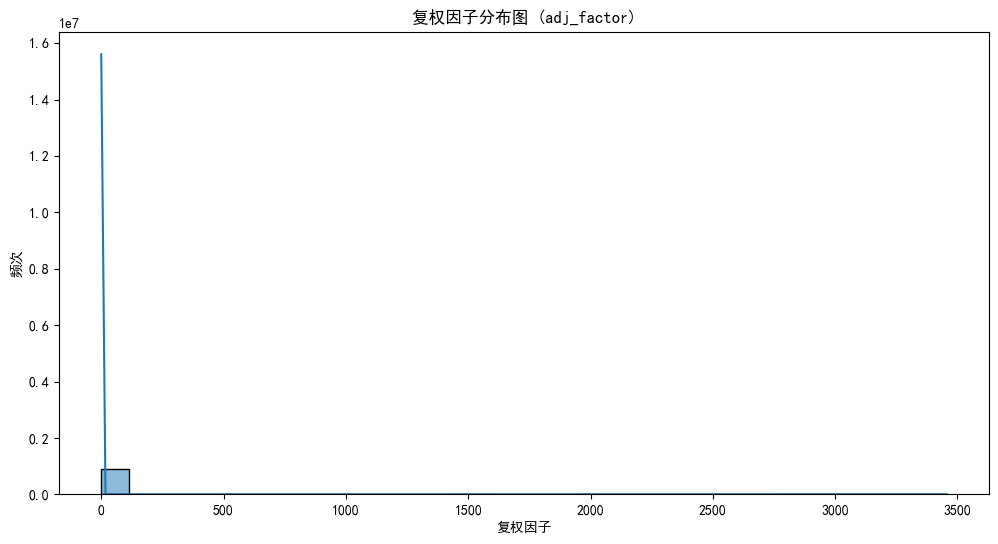

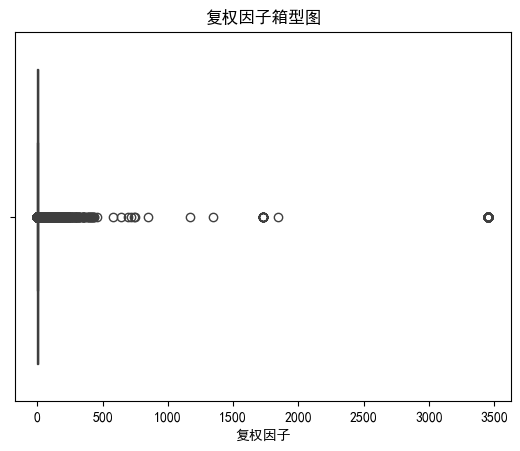

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# 数据缺失情况统计
missing_data = final_merged_data.isna().sum()
print("缺失数据统计:\n", missing_data)

# 描述统计分析
print("描述性统计分析:\n", final_merged_data.describe())


# 设置字体为 SimHei，确保可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号问题


# 绘制复权因子分布图
plt.figure(figsize=(12, 6))
sns.histplot(final_merged_data['adj_factor'], bins=30, kde=True)
plt.title("复权因子分布图 (adj_factor)")
plt.xlabel("复权因子")
plt.ylabel("频次")
plt.show()

# 绘制复权因子的箱型图
sns.boxplot(x=final_merged_data['adj_factor'])
plt.title("复权因子箱型图")
plt.xlabel("复权因子")
plt.show()


In [61]:
!pip install scikit-learn --proxy=http://127.0.0.1:10809


Defaulting to user installation because normal site-packages is not writeable


In [72]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# 假设你已经有了合并后的数据集和相关数据：
# merged_df: 合并后的数据框，其中包含 'DocumentTitle', 'iq_company_name', 'company_name', 'date', 'close_cq', 'close_rf', 'adj_factor_cq', 'adj_factor_rf' 等字段

# 1. 公司名称匹配准确率
def company_name_matching_accuracy(merged_df):
    # 计算匹配的公司数量
    matched_companies = merged_df[merged_df['iq_company_name'] == merged_df['company_name']].shape[0]
    total_companies = merged_df.shape[0]
    return matched_companies / total_companies

# 2. 日期匹配率
def date_matching_accuracy(cq_price, rf_price):
    # 计算两个数据源的共同日期
    common_dates = pd.merge(cq_price[['date', 'ticker']], rf_price[['date', 'RIC']], on='date', how='inner')
    total_dates = len(cq_price['date'].unique())  # 使用cq数据的日期数作为总日期数
    return len(common_dates) / total_dates

# 3. 价格修复一致性（通过均方误差 MSE 计算）
def price_repair_consistency(cq_price, rf_price, date_col='date', price_col='close'):
    # 将两个数据源按日期合并
    merged_prices = pd.merge(cq_price[[date_col, price_col]], rf_price[[date_col, price_col]], on=date_col, how='inner', suffixes=('_cq', '_rf'))
    # 计算 MSE
    mse = mean_squared_error(merged_prices[f'{price_col}_cq'], merged_prices[f'{price_col}_rf'])
    return mse

# 4. 复权因子一致性
def adj_factor_consistency(cq_price, rf_price, date_col='date', adj_factor_col='adj_factor'):
    # 将两个数据源按日期合并
    merged_factors = pd.merge(cq_price[[date_col, adj_factor_col]], rf_price[[date_col, adj_factor_col]], on=date_col, how='inner', suffixes=('_cq', '_rf'))
    # 计算一致性误差
    adj_factor_diff = np.abs(merged_factors[f'{adj_factor_col}_cq'] - merged_factors[f'{adj_factor_col}_rf'])
    return adj_factor_diff.mean()  # 返回平均误差

# 5. 综合可信度计算
def calculate_overall_confidence(company_accuracy, date_accuracy, price_mse, adj_factor_error, company_weight=0.3, date_weight=0.2, price_weight=0.3, adj_factor_weight=0.2):
    # 将 MSE 和 adj_factor_error 转化为一致性评分
    price_consistency = 1 - price_mse  # 通过 MSE 转化为一致性（MSE 越小，可信度越高）
    adj_factor_consistency = 1 - adj_factor_error  # 通过平均误差转化为一致性（误差越小，可信度越高）

    # 综合可信度评分
    overall_confidence = (company_weight * company_accuracy + 
                          date_weight * date_accuracy + 
                          price_weight * price_consistency + 
                          adj_factor_weight * adj_factor_consistency)
    
    return overall_confidence

# 假设 merged_df 是合并后的数据框
# merged_df['close_cq'], merged_df['close_rf'] 为价格列
# merged_df['adj_factor_cq'], merged_df['adj_factor_rf'] 为复权因子列

# 示例：计算公司名称匹配准确率
company_accuracy = company_name_matching_accuracy(merged_df)
print(f'公司名称匹配准确率: {company_accuracy * 100:.2f}%')



公司名称匹配准确率: 10.90%


In [74]:
date_accuracy = date_matching_accuracy(cq_price, rf_price)
print(f'日期匹配率: {date_accuracy * 100:.2f}%')

MemoryError: Unable to allocate 14.6 GiB for an array with shape (1953709328,) and data type int64

In [79]:
# 示例：计算价格修复一致性
price_mse = price_repair_consistency(cq_price, rf_price)
print(f'价格修复MSE: {price_mse:.4f}')

# 示例：计算复权因子一致性
adj_factor_error = adj_factor_consistency(cq_price, rf_price)
print(f'复权因子一致性误差: {adj_factor_error:.4f}')


# 计算整体可信度
confidence = calculate_overall_confidence(company_accuracy, date_accuracy, price_mse, adj_factor_error)
print(f'整体可信度评分: {confidence * 100:.2f}%')


MemoryError: Unable to allocate 14.6 GiB for an array with shape (1953709328,) and data type int64